In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import cv2

In [3]:
from os import listdir
from os.path import isfile, join

In [4]:
from pokedex.prediction import card_ocr_crop
from pokedex.edges.deformer import deform_card
from pokedex.text_detection import ocr_preprocessor, get_pokeid

(2475, 1800, 3)

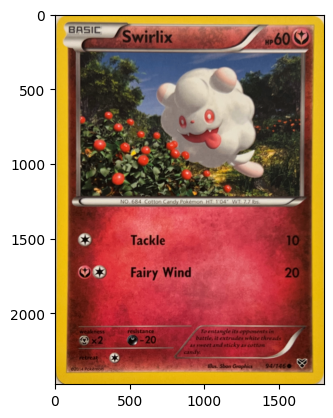

In [39]:
# Get the photo location
photo_path = '../../raw_data/PokemonCards/white_background_jpgs/xy1-94_2.jpg'

# Process photo to detect edges and cut corners
card_image = deform_card(photo_path) # outputs a card with (HIRES_HEIGHT, HIRES_WIDTH) size

plt.imshow(card_image)
card_image.shape

/var/folders/zs/9clhw6z50g3d3dytww5n3qhw0000gn/T/ipykernel_2381/3717634994.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10,60))


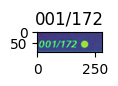

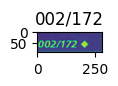

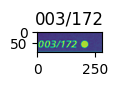

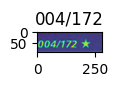

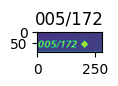

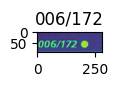

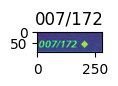

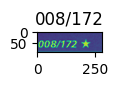

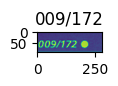

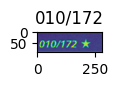

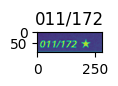

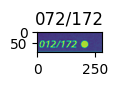

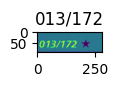

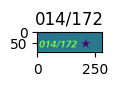

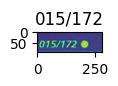

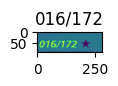

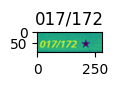

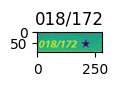

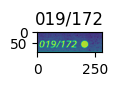

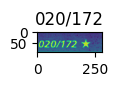

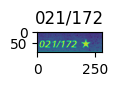

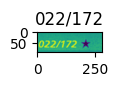

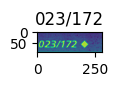

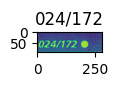

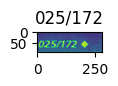

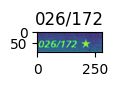

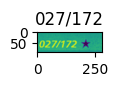

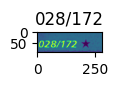

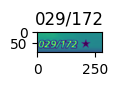

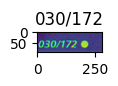

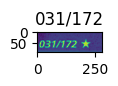

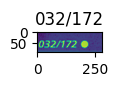

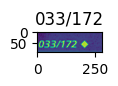

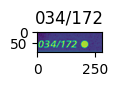

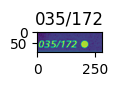

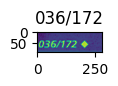

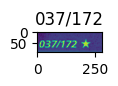

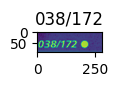

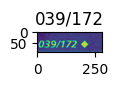

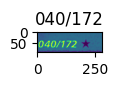

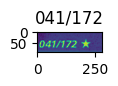

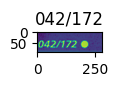

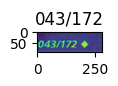

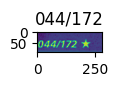

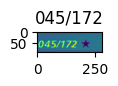

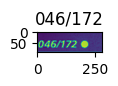

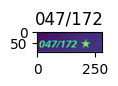

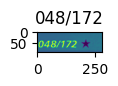

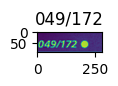

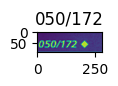

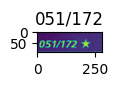

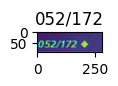

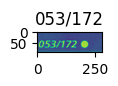

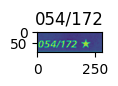

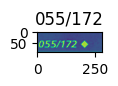

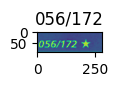

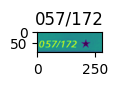

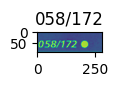

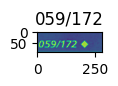

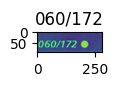

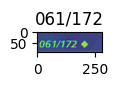

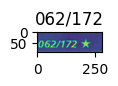

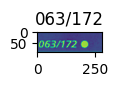

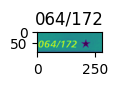

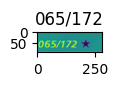

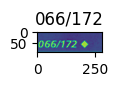

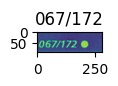

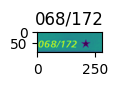

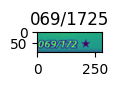

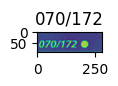

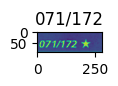

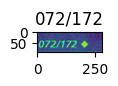

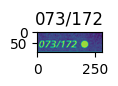

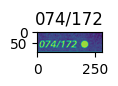

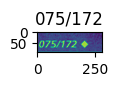

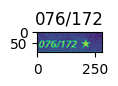

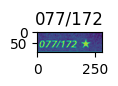

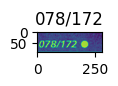

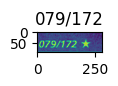

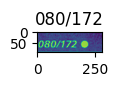

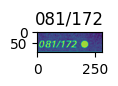

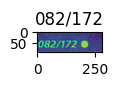

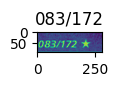

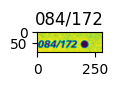

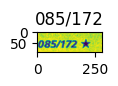

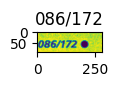

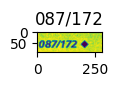

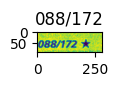

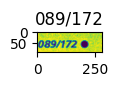

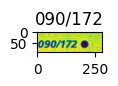

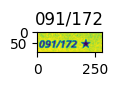

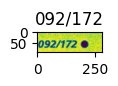

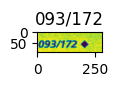

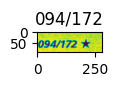

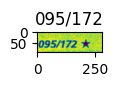

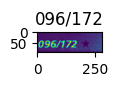

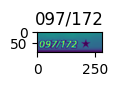

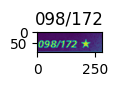

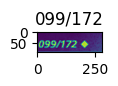

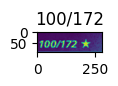

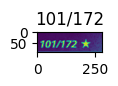

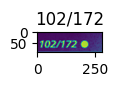

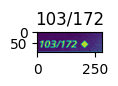

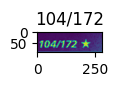

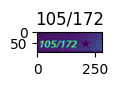

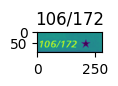

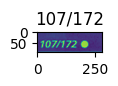

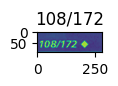

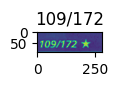

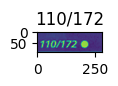

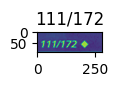

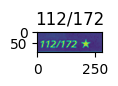

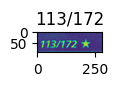

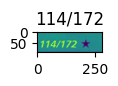

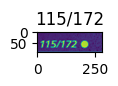

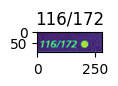

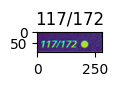

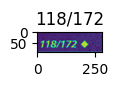

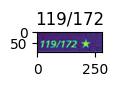

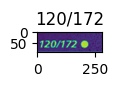

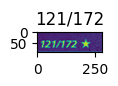

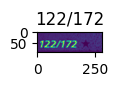

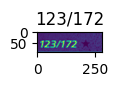

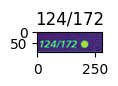

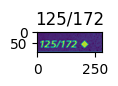

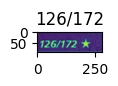

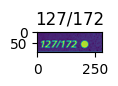

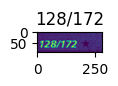

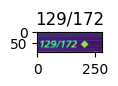

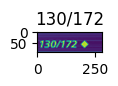

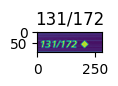

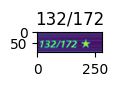

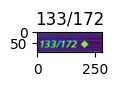

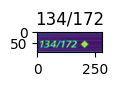

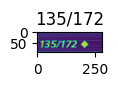

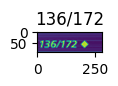

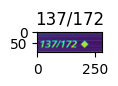

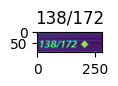

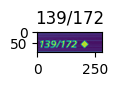

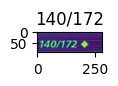

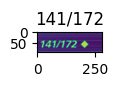

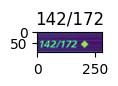

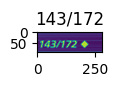

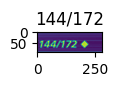

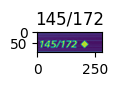

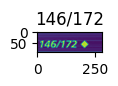

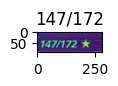

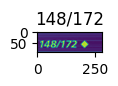

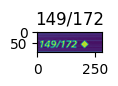

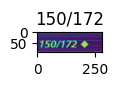

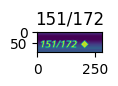

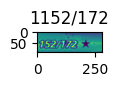

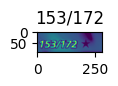

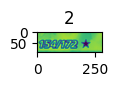

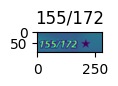

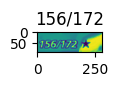

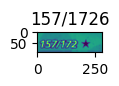

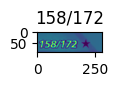

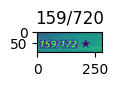

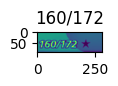

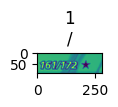

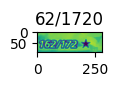

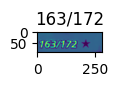

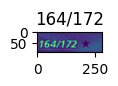

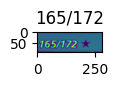

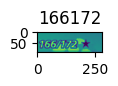

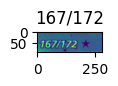

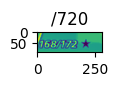

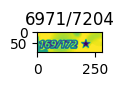

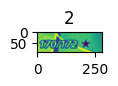

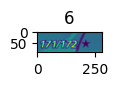

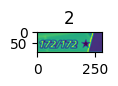

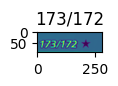

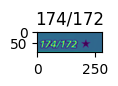

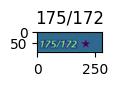

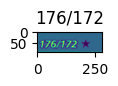

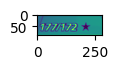

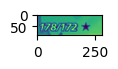

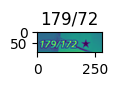

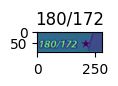

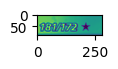

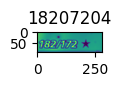

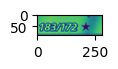

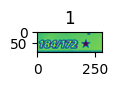

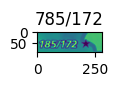

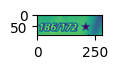

In [122]:
# Get the photo location
filepath = '../../raw_data/pokemon_cards_api/'
set_id = 'swsh9' #
nb_cards = 186 #
for i in range(1,nb_cards+1):
    photo_path = f"{filepath}card_{set_id}_{i}.png"

    card = Image.open(photo_path)
    card_image = cv2.resize(np.array(card), (1800, 2475))

    bottomcorner = card_ocr_crop(card_image, set_id)
    
    preprocessed_img = ocr_preprocessor(bottomcorner,set_id)

    im_text = get_pokeid(bottomcorner,set_id)

    plt.figure(figsize=(10,60))
    plt.subplot(nb_cards,1,i)
    plt.imshow(preprocessed_img)
    plt.title(im_text)

In [79]:
plt.close()

In [55]:
set_id = 'xy1'

(216, 600, 4)

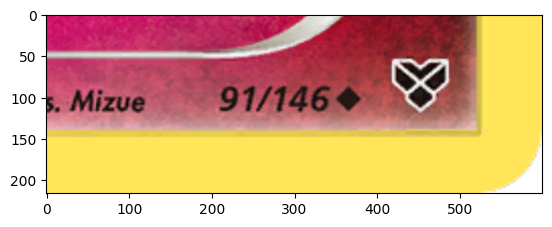

In [56]:
bottomcorner = card_ocr_crop(card_image, set_id)
plt.imshow(bottomcorner)
bottomcorner.shape

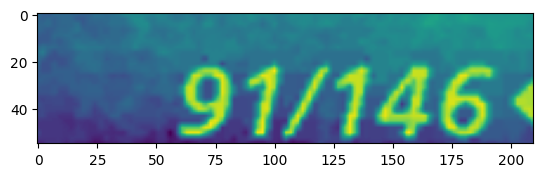

In [57]:
preprocessed_img = ocr_preprocessor(bottomcorner,set_id)
np.array(preprocessed_img).shape
plt.imshow(preprocessed_img)

In [58]:
# -- add OCR model -- #
im_text = get_pokeid(bottomcorner,set_id)
im_text

'91/146'